In [58]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Dogs and cat Classifier')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
!pip install opencv-python

In [60]:
dogs_folder = '/content/drive/My Drive/Dogs and cat Classifier/Dogs'
cats_folder = '/content/drive/My Drive/Dogs and cat Classifier/Cats'

In [61]:
dog_files = os.listdir(dogs_folder)
cat_files = os.listdir(cats_folder)

In [62]:
print(len(cat_files))
print(len(dog_files))

169
161


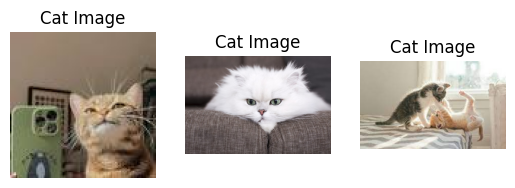

In [63]:
for i in range(3):  # Display the first 3 cat images
    cat_image = Image.open(os.path.join(cats_folder, cat_files[i]))
    plt.subplot(1, 3, i + 1)
    plt.imshow(cat_image)
    plt.axis('off')
    plt.title('Cat Image')

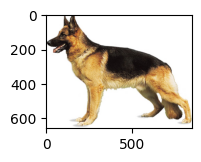

In [64]:
Dog_image = Image.open(os.path.join(dogs_folder, dog_files[2]))
plt.subplot(1,3,2)
plt.imshow(Dog_image)

In [65]:
import cv2
target_size = (128,128)
output_folder = '/content/drive/My Drive/Dogs and cat Classifier/ Rescaled Images3'
os.makedirs(output_folder, exist_ok=True)

def resize_and_save_image(input_path, output_path, target_size):
    image = cv2.imread(input_path)
    if image is not None:
      resized_image = cv2.resize(image, target_size)
      cv2.imwrite(output_path, resized_image)

for cat_filename in os.listdir(cats_folder):
    cat_image_path = os.path.join(cats_folder, cat_filename)
    cat_output_path = os.path.join(output_folder, 'cat_' + cat_filename)  # Rename to avoid overwriting
    resize_and_save_image(cat_image_path, cat_output_path, target_size)

for dog_filename in os.listdir(dogs_folder):
    dog_image_path = os.path.join(dogs_folder, dog_filename)
    dog_output_path = os.path.join(output_folder, 'dog_' + dog_filename)  # Rename to avoid overwriting
    resize_and_save_image(dog_image_path, dog_output_path, target_size)

In [66]:
import os
import cv2
import numpy as np

# Define the directory path for resized images
resized_folder = '/content/drive/My Drive/Dogs and cat Classifier/ Rescaled Images3'  # Replace with the actual path to your "resized_images" folder

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through the images in the folder
for filename in os.listdir(resized_folder):
    image_path = os.path.join(resized_folder, filename)

    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale image

    if image is not None:
        # Resize the image (optional if it's already resized)
        # image = cv2.resize(image, (128, 128))

        # Convert the 2D image array to a 1D vector
        flattened_image = image.reshape(-1)

        # Append the flattened image to the data list
        data.append(flattened_image)

        # Determine the label (e.g., 'cat' or 'dog') based on the filename
        if 'cat' in filename:
            label = 1
        elif 'dog' in filename:
            label = 0
        # else:
        #     label = 'unknown'
        labels.append(label)

# Convert the data and labels lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)


In [67]:
df = pd.DataFrame({'Data': data.tolist(), 'Labels': labels.tolist()})
df_N = df.sample(frac=1.0).reset_index(drop=True)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state = 42)

In [144]:
# X_test.shape
Y_test.shape
X_train.shape

(262, 16384)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.83873637,  0.81722313,  0.80763433, ..., -0.24937286,
        -0.24811309, -0.26226978],
       [-0.74034183, -0.76118177, -0.78197603, ..., -1.25965266,
        -1.20123704, -1.41214767],
       [-0.63017358, -0.71223898, -0.66063173, ...,  0.5307166 ,
         0.80805129,  0.79915597],
       ...,
       [ 1.29165027,  1.29441531,  1.30514597, ..., -1.14455749,
        -1.22699715, -1.14679124],
       [-0.75258275, -0.99366001, -1.02466463, ...,  0.56908166,
         0.60197044,  0.68543179],
       [ 0.82649545,  0.70710186,  0.52854243, ...,  0.78648364,
         0.8595715 ,  0.84970006]])

In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

In [172]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape

(262, 50)

In [173]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [174]:
model = models.Sequential([
    layers.Dense(50,activation = 'relu'),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid'),
])

In [175]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [176]:
model.fit(X_train_trf,Y_train, batch_size = 30, epochs = 20)

Epoch 1/20
9/9 [==============================] - 3s 3ms/step - loss: 1.5193 - accuracy: 0.5687
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.6908
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8053
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.9084
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9237
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9618
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.9733
Epoch 8/20
9/9 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.9809
Epoch 9/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9924
Epoch 10/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9885
Epoch 11/20
9/9 [======================

In [177]:
Y_pred = model.predict(X_test_trf)
for i in range(len(Y_pred)):
  if Y_pred[i]<0.5:
    Y_pred[i] = 0
  else:
    Y_pred[i] = 1
# Y_pred

3/3 [==============================] - 0s 3ms/step


In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.7121212121212122

In [179]:
pca2 = PCA(n_components = 3)
justtest = pca2.fit_transform(X_train)
justtest.shape

(262, 3)

In [184]:
import plotly.express as px
y_train_trf = Y_train.astype(str)
fig = px.scatter_3d(x = justtest[:,0],
                    y = justtest[:,1],
                    z = justtest[:,2],
                    color = y_train_trf)
fig.update_layout(margin = dict(l=20,r=20,t=20,b=20))
fig.show()